In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/heart_disease_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [4]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of heart disease')

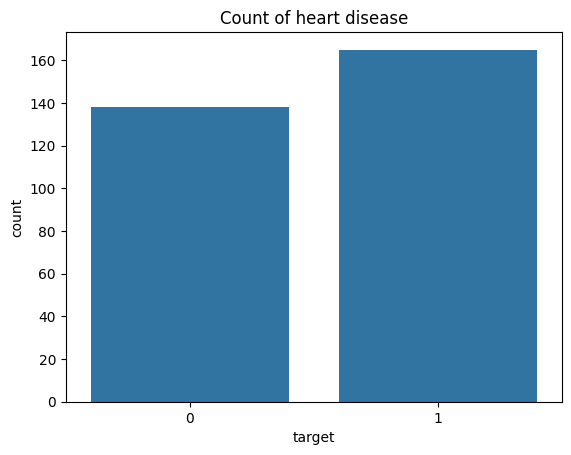

In [5]:
sns.countplot(x = "target", data = data)
plt.title("Count of heart disease")

In [6]:
X = data.drop("target", axis=1)
Y = data["target"]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=80)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split = 10, random_state = 10)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=10)

In [15]:
clf.feature_importances_

array([0.07173504, 0.04060983, 0.14598355, 0.06759677, 0.04498131,
       0.00619835, 0.01183075, 0.11148266, 0.05731827, 0.11103109,
       0.05559571, 0.13833241, 0.13730427])

In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
Y_pred = clf.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_pred)
print(score)

0.8852459016393442


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, Y_train, cv=10)

array([0.88      , 0.8       , 0.83333333, 0.875     , 0.83333333,
       0.91666667, 0.79166667, 0.70833333, 0.66666667, 0.79166667])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.95      0.88      0.91        42

    accuracy                           0.89        61
   macro avg       0.86      0.89      0.87        61
weighted avg       0.89      0.89      0.89        61



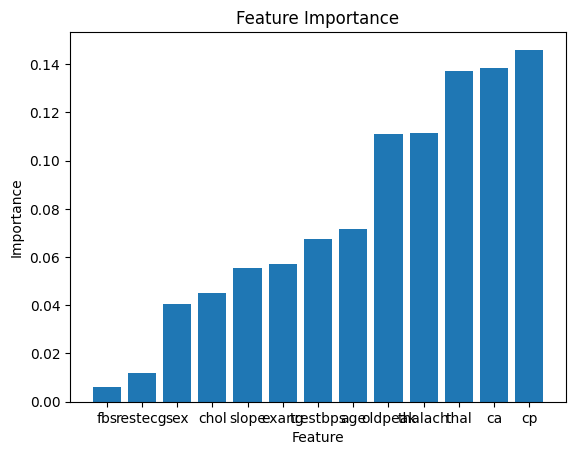

In [30]:
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title("Feature Importance")
plt.bar(features[indices], importances[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()